In [1]:
import pandas as pd


In [5]:
df = pd.read_csv('sample.csv')

In [13]:
import matplotlib.pyplot as plt

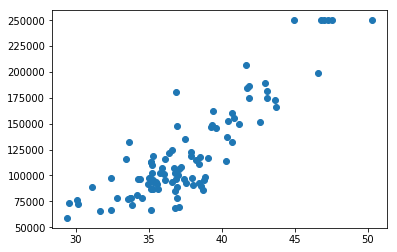

In [16]:
plt.scatter(x, y)
plt.show() # データの散布図を表示できる。まだこれではデータの平均化ができていないので、平均化を行う

In [22]:
df.describe() # describeする事で、様々な必要なデータを見ることができる

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [23]:
df.mean() # x y の平均を求める

x        37.62222
y    121065.00000
dtype: float64

In [25]:
df_c = df - df.mean() # データの中心化を行う

In [28]:
df_c.describe() # 実際に中心化ができているのか確認する

,x,y
count,1.000000e+02,100.000000
mean,1.918465e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [31]:
x = df_c['x']

In [83]:
y = df_c['y']

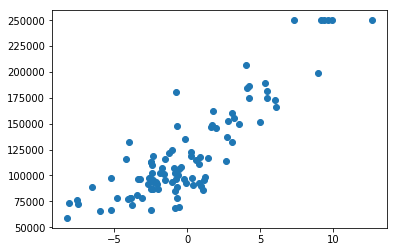

In [34]:
plt.scatter(x, y)
plt.show() # 実際に中心化されたデータがプロットされている

## パラメータaの計算


In [36]:
xx = x * x


In [55]:
xy = x * y

In [38]:
a = xy.sum() / xx.sum()

10069.022519284075

## 傾きaの線を表示して見る

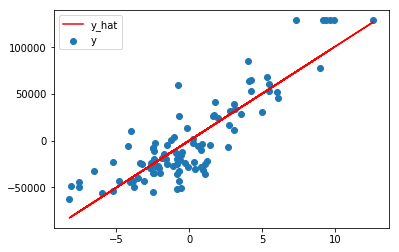

In [62]:
plt.scatter(x, y, label="y") # 実測値
plt.plot(x, a*x, label="y_hat", color='red') # 予測式を引く
plt.legend()
plt.show() 
# いい感じに線が引けてるのを確認できる

In [63]:
## 実際の値を予測して見る

In [64]:
new_x = 40 # 40平米の部屋の家賃を予測して見る

In [66]:
mean = df.mean()

In [67]:
mean['x'] # xのデータの平均を取得

37.62222

In [72]:
xc = new_x - mean['x'] # 調べたいデータを中心化

In [73]:
xc # 中心化された！

2.3777800000000013

In [75]:
yc = a * xc # 単回帰分析による予測。aはすでに求めている。
# ycは、中心化を行った時の値になっているので、中心化を行う前に戻してあげる

In [78]:
new_y = yc + mean['y'] # もともと中心化のためにyの平均をひいていたので、
# 今度は元に戻すために足してあげる。

In [79]:
new_y # これで予測結果が出てくる！！！！！！！

145006.9203659033

## 以上のことを関数化する


In [90]:
def culcurate_paramter():
    df = pd.read_csv('sample.csv')
    df_c = df - df.mean() # データの中心化を行う
    x = df_c['x']
    y = df_c['y']
    xx = x * x
    xy = x * y
    a = xy.sum() / xx.sum()
    return a, df


def culucurate_new_y(new_x):
    a, df = culcurate_paramter()
    mean = df.mean()
    new_x_c = new_x - mean['x'] # xの平均を引くことによって、これでnew_xを中心化できた。
    yc = a * new_x_c # 単回帰分析を回す
    new_y = yc + mean['y']
    return new_y
    

    

In [99]:
culucurate_new_y(49)

235628.12303945984